# Статистика, DS-поток
## Задание SP.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 80 баллов

**Важность задач:**

* *высокая:* задачи 3;
* *средне-высокая:* задачи 1, 4;
* *обычная* задачи 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил выводы</font></b>

* <b><font size="4">Задача 4</font></b>
  * <b><font color="#00b565" size="3">Исправил код (поправил графики)</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [1]:
# Bot check

# HW_ID: ds_sp1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='Set2')

import time
import matplotlib.pyplot as plt

---
## Задача 1.

Реализуйте метод Монте-Карло и метод прямоугольников численного интегрирования функций, используя приведенный ниже шаблон. Реализация должна уметь оценивать интегралы вида
$$ \int\limits_{\ell_1}^{h_1} ... \int\limits_{\ell_d}^{h_d} f(x_1, ... , x_d)\ dx_1 ... dx_d $$
для произвольной заданной функции $f$.

Реализация получает на вход векторы $\ell = (\ell_1, ... , \ell_d)$ и $h = (h_1, ... ,h_d)$, а также число $n$ &mdash; количество итераций оценки интеграла. В случае метода прямоугольников число итераций равно количеству используемых прямоугольников, а в случае метода Монте-Карло &mdash; размеру генерируемой выборки. 

*Требования:*
1. Значение функции $f$ можно посчитать только в $n$ точках.
2. Реализация не должна использовать какие-либо циклы, кроме циклов по числу интегралов $d$.
3. Для ускорения вычислений генерацию случайных чисел стоит производить с помощью `numpy.random`.
4. При реализации метода прямоугольников используйте равномерное разбиение по каждой координатной оси.

*Подсказка:* при реализации метода Монте-Карло обрати внимание на один из примеров с лекции.

Для быстрой работы метода прямоугольников используйте функцию <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">`numpy.meshgrid`</a>. Ниже есть пример ее использования. 

In [3]:
# Предположим, мы хотим получить координаты всех целых точек (x, y), 
# таких, что x лежит в промежутке [5, 6], а y - в промежутке [-3, -1]

linspace_x = [5, 6]  
linspace_y = [-3, -2, -1]

# возвращает матрицы с координатами сетки,
# задаваемой проекциями точек на оси координат
X, Y = np.meshgrid(linspace_x, linspace_y)

print("X: ", X)  # linspace_x повторилась len(linspace_y) раз по оси 0
print("Y: ", Y)  # linspace_y повторилась len(linspace_x) раз по оси 1

# преобразуем исходный формат к вектору точек
np.stack([X, Y]).reshape(2, -1).T

X:  [[5 6]
 [5 6]
 [5 6]]
Y:  [[-3 -3]
 [-2 -2]
 [-1 -1]]


array([[ 5, -3],
       [ 6, -3],
       [ 5, -2],
       [ 6, -2],
       [ 5, -1],
       [ 6, -1]])

In [4]:
class Integrator:
    
    @staticmethod
    def integrate(func, low, high, n_iter, method="rectangle"):
        """
        Оценка определенного интеграла.
        
        Аргументы:
        f --- векторная функция d-мерной переменной.
            Реализация функции на вход принимает матрицу (n, d),
            где n - число точек, в которых нужно вычислить функцию,
            а d - размерность пространства переменных.
            Функция должна вернуть вектор размерности n.
        low, high --- нижние и верхние пределы интегрирования,
            векторы размера d. Передаются в том же порядке,
            в котором функция принимает аргументы.
        n --- максимальное число вызовов функции f.
        method --- метод ("rectangle" или "monte_carlo").
                            
        Возвращает приближенное значение интеграла.
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n_iter = int(n_iter)
        d = len(low)  # вычисляем кол-во интегралов
        return Integrator.methods[method](func, low, high, n_iter, d)
    
    
    def integrate_monte_carlo(func, low, high, n_iter, d):
        """Метод Монте-Карло"""
        random_points = np.random.uniform(low, high, size=(n_iter, d))  # генерируем рандомные точки
        values = func(random_points)  # вычисляем в них функцию
        I = np.prod(high - low) * np.mean(values)  # оцениваем интеграл
        return I 
    
    
    def integrate_rectangle(func, low, high, n_iter, d):
        """Метод прямоугольников"""
        # Чтобы в сетке было суммарно n_iter точек (прямоугольников), нужно взять n_iter ** 1/d точек по каждой оси
        n_iter_root = int(np.ceil(np.power(n_iter, 1/d)))
        dx = (high - low) / n_iter_root  # шаг в d измерениях
        mesh = np.meshgrid(*[np.linspace(low[i] + dx[i]/2, high[i] - dx[i]/2, n_iter_root) for i in range(d)])  # вводим равномерную сетку из точек
        grid_points = np.stack(mesh).reshape(d,-1).T
        values = func(grid_points)  # вычисляем в них функцию
        I = np.prod(dx) * np.sum(values)  # оцениваем интеграл
        return I
    
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }

Исследуем работу реализованных методов по оценке интеграла
$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i,$$
то есть интегралы вида $\int\limits_0^1 x_1^2\ dx_1$, $\int\limits_0^1 \int\limits_0^1 \left( x_1^2 + x_2^2 \right)\ dx_1 dx_2$ и так далее.

Посчитайте точное значение этого интеграла в зависимости от $d$ теоретически.

*Решение приложил отдельным файлом (1.pdf), там получилось d/3*

Вычислите $\int\limits_0^1 \int\limits_0^1 \left(x^2 + y^2\right)\ dxdy$ на миллионе запусков функции $f(x, y) = x^2+y^2$ двумя рассмотренными методами. Измерьте время работы методов и сравните результат с истинными значением интеграла. Различается ли время работы методов? Объясните результаты с точки зрения теории.

In [5]:
func = lambda m: np.sum(m*m, axis=1)  # матрица n x d -> вектор длины n (тут: матрица 1e6 x 2 -> вектор длины 1e6)

In [6]:
%%time
Integrator.integrate(func=func, low=np.array([0,0]), high=np.array([1,1]), n_iter=1e6, method='monte_carlo')

CPU times: total: 46.9 ms
Wall time: 47.8 ms


0.6666872465103543

In [7]:
%%time
Integrator.integrate(func=func, low=np.array([0,0]), high=np.array([1,1]), n_iter=1e6, method='rectangle')

CPU times: total: 46.9 ms
Wall time: 29.5 ms


0.6666664999999996

*__Промежуточные выводы:__*  
*1) в обоих случаях <ins>значение совпало</ins>  с теоретическим $ (2/3 \approx 0.66... )$ в пределах погрешности, т.е. глобально - алгоритмы справились с задачей. Однако видно, что метод прямоугольнико оказался на пару знаков точнее*  
*2) время работы методов оказалось различным: <ins>rectangle справился быстрее</ins> в несколько раз*  
*Это логично, ведь в ситуациях низкой размерности (d=2) и гладкой функции метод прямоугольников, как правило, оказывается точнее и быстрее (т.к. при прочих равных не требует генерации случайной выборки)*  

Сравним скорость сходимости методов семпирования для $d = 1...8$. Для этого для каждого $d$ постройте график зависимости оценки двумя методами значения интеграла от количества итераций $n$. Рекомендуется рассмотреть значения $n$ вплоть до $d \times 1000$.

Аналогично сравните время работы методов.

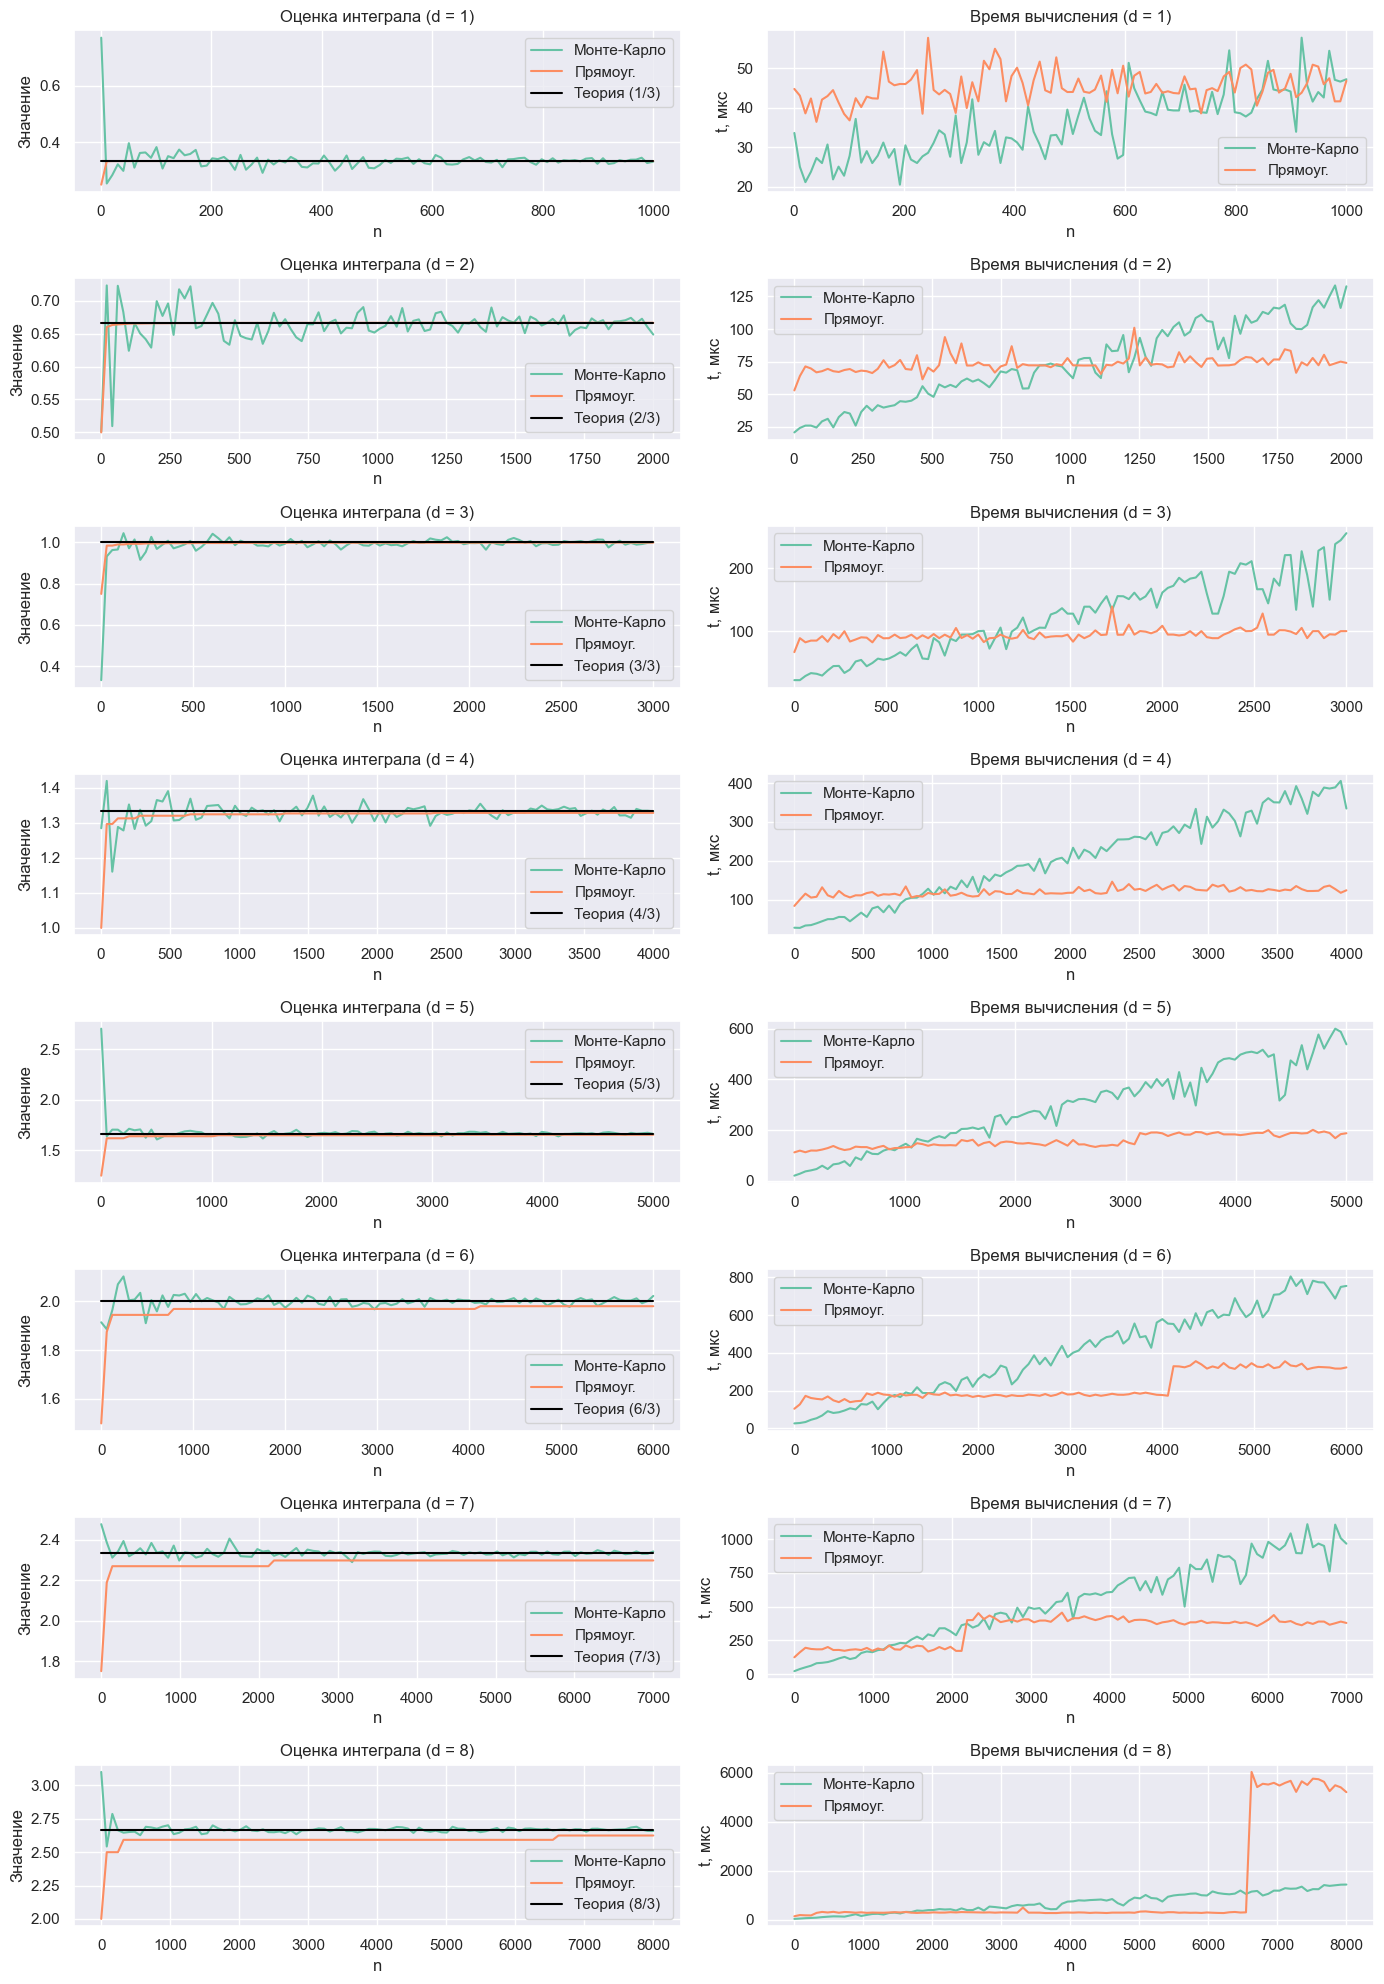

In [8]:
xp = {d: {method: {'values':[],'times':[]} for method in ['monte_carlo','rectangle']} for d in range(1,9)}

for d in range(1,9):
    xp[d]['ns'] = [int(x) for x in np.linspace(1, d * 1000, 100)]
    for n in xp[d]['ns']:
        for method in ['monte_carlo','rectangle']:
            start_time = time.time()
            xp[d][method]['values'].append(Integrator.integrate(func=func, low=np.array([0]*d), high=np.array([1]*d), n_iter=n, method=method))  # значение с первого запуска
            for _ in range(2999):  # еще 2999 холостых запусков, считаем суммарное время работы
                Integrator.integrate(func=func, low=np.array([0]*d), high=np.array([1]*d), n_iter=n, method=method)
            end_time = time.time()
            xp[d][method]['times'].append((end_time - start_time) / 3000 * 1e6)  # время (в мкс) усредним за много запусков, чтобы сгладить шум

fig, axs = plt.subplots(8, 2, figsize=(14,20))
for d in range(1,9):
    for i, title, ylabel, measure in [(0,f'Оценка интеграла (d = {d})','Значение','values'),(1,f'Время вычисления (d = {d})','t, мкс','times')]:
        axs[d-1,i].set_title(title)
        axs[d-1,i].set(xlabel='n', ylabel=ylabel)
        axs[d-1,i].plot(xp[d]['ns'], xp[d]['monte_carlo'][measure], label='Монте-Карло')
        axs[d-1,i].plot(xp[d]['ns'], xp[d]['rectangle'][measure], label='Прямоуг.')
        if i == 0:
            axs[d-1,i].plot(xp[d]['ns'], [d/3]*len(xp[d]['ns']), color='black', label=f'Теория ({d}/3)')
        axs[d-1,i].legend()
fig.tight_layout()
plt.show()

Какой метод и при каких $d$ сходится быстрее? Предположите, в каком случае выгоднее использовать тот или иной метод. С чем связано такое поведение графиков?

<b><font color="#00b565" size="5">Исправил выводы</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>Нет сравнения с теоретическими скоростями сходимостей методов. Комм. Хотелось бы явно указать скорость сходимостей методов (метод прямоугольников 1/n^(2/d), метод М-К 1/sqrt{n}). (-3.0)</i>

***Выводы:***  
*1) Чем больше число итераций n, тем точнее оценка интеграла обоими методами*  
*2) Среднее время работы метода Монте-Карло линейно зависит от n, так как на графиках t(n) виден явный тренд. Такое поведение графика объясняется тем, что пропорционально n растет число вычислений. У метода прямоугольноков время работы зависит от n менее понятным образом, но все равно растет с ростом n (по той же причине)*  
*3) При всех d графики t(n) для двух методов методов пересекаются примерно в точке n = 1000. То есть для всех проверенных d: при малом кол-ве итераций быстрее сойдется метод Монте-Карло, но если число итераций n > 1000, то быстрее сойдется метод прямоугольников. В частности, мысленно продолжая линии тренда, можем утверждать, что для миллиона точек метод прямоугольников окажется быстрее, что соотносится с предыдущим экспериментом. Такое различие объясняется затратной по времени генерацией случайной выборки в методе Монте-Карло*
*4) Отметим, что все проверенные значения d очень малы (< 9). Метод Монте-Карло эффективен при работе с высокими размерностями, поэтому в этом эксперименте не удалось в полной мере продемонстрировать его преимущества. При малых d выгоднее использоать метод прямоугольников, а при больших - метод Монте-Карло*  
<b><font color="#00b565" >*5) Отдельно отметим, что различия в скорости работы методов объясняются их разной теоретической скоростью сходимости. Как было доказано на лекции, у метода прямоугольников: $t(n) \sim \frac{1}{n^{2/d}}$, а у метода Монте-Карло: $t(n) \sim \frac{1}{\sqrt{n}}$ (что становится эффективнее при больших размерностях)*</font></b>

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>



---
## Задача 2.

Оценим константу плотности нормального распределения с помощью численного интегрирования. Тем самым, необходимо оценить интеграл
$$\int\limits_{\mathbb{R}^d} \exp \left( - \frac12 x^Tx \right) dx.$$
При домножении интеграла на эту константу должна получиться единица.

Чему равно истинное значение этой константы?

*Значение константы для нормального распределения известно из курсов тервера\интеграла Лебега:* $ \frac{1}{\left(\sqrt{2\pi}\right)^{d}} = (2\pi)^{-d/2}$

Прежде чем переходить к оценке, поразмышляйте над следующими вопросами.
1. Что будет, если выбрать слишком большие пределы в методе Монте-Карло? 
2. Что может произойти, если выбрать слишком большие пределы в методе прямоугольников?
3. Что будет, если выбрать слишком маленькие пределы?
4. Какие пределы кажутся оптимальными и почему?

***Ответ:***  
*В этой задаче мы работаем с нормальным распределением, поэтому далее речь именно о нем. Важно, что его график имеет горб в х=0 и стремится к 0 на бесконечности.*  
*1) Отличие метода Монте-Карло в том, что сетка не регулярная, а берется из равномерного распределения. Если взять слишком большие пределы и редкую сетку, то точки сетки легко могут "проскочить" окрестность нуля. Т.е. во всех точках сетки значение функции окажется близким к 0 и оценка интеграла получится искаженной*  
*2) В методе прямоугольников используется равномерная сетка, но проблема "проскакивания" информативной части графика сохраняется. Если взять слишком большие пределы и редкую сетку, то горб нормального распределения легко может попасть в интервал между точками сетки. Т.е. во всех точках сетки значение функции окажется близким к 0, и оценка интеграла тоже получится заниженной. Либо еще возможен вариант, что одна точка попадет в горб, но из-за редкой сетки(большого шага dx) площадь прямоугольника будет значительно больше искомого интеграла, что зависит оценку (но такой вариант менее вероятен)*  
*3) Если выбрать слишком маленькие пределы, то в оценке интеграла не будут учитываться "хвосты" распределения. У нормального распределения хвостами часто можно пренебречь в рамках погрешности, но все равно - чересчур маленькие пределы выставлять не стоит*  
*4) Оптимальными кажутся пределы в 3-5 сигм. Логика такая же, как и в методах 3\5 сигм в физике: именно в этом диапазоне заключена основная масса графика \ площадь под кривой (>99%)*  

Сравните результаты работы методов для случаев
* слишком маленьких пределов.
* оптимальных пределов,
* слишком больших пределов

*Подсказка:* здесь достаточно несколько раз применить написанную ранее реализацию и сделать вывод.

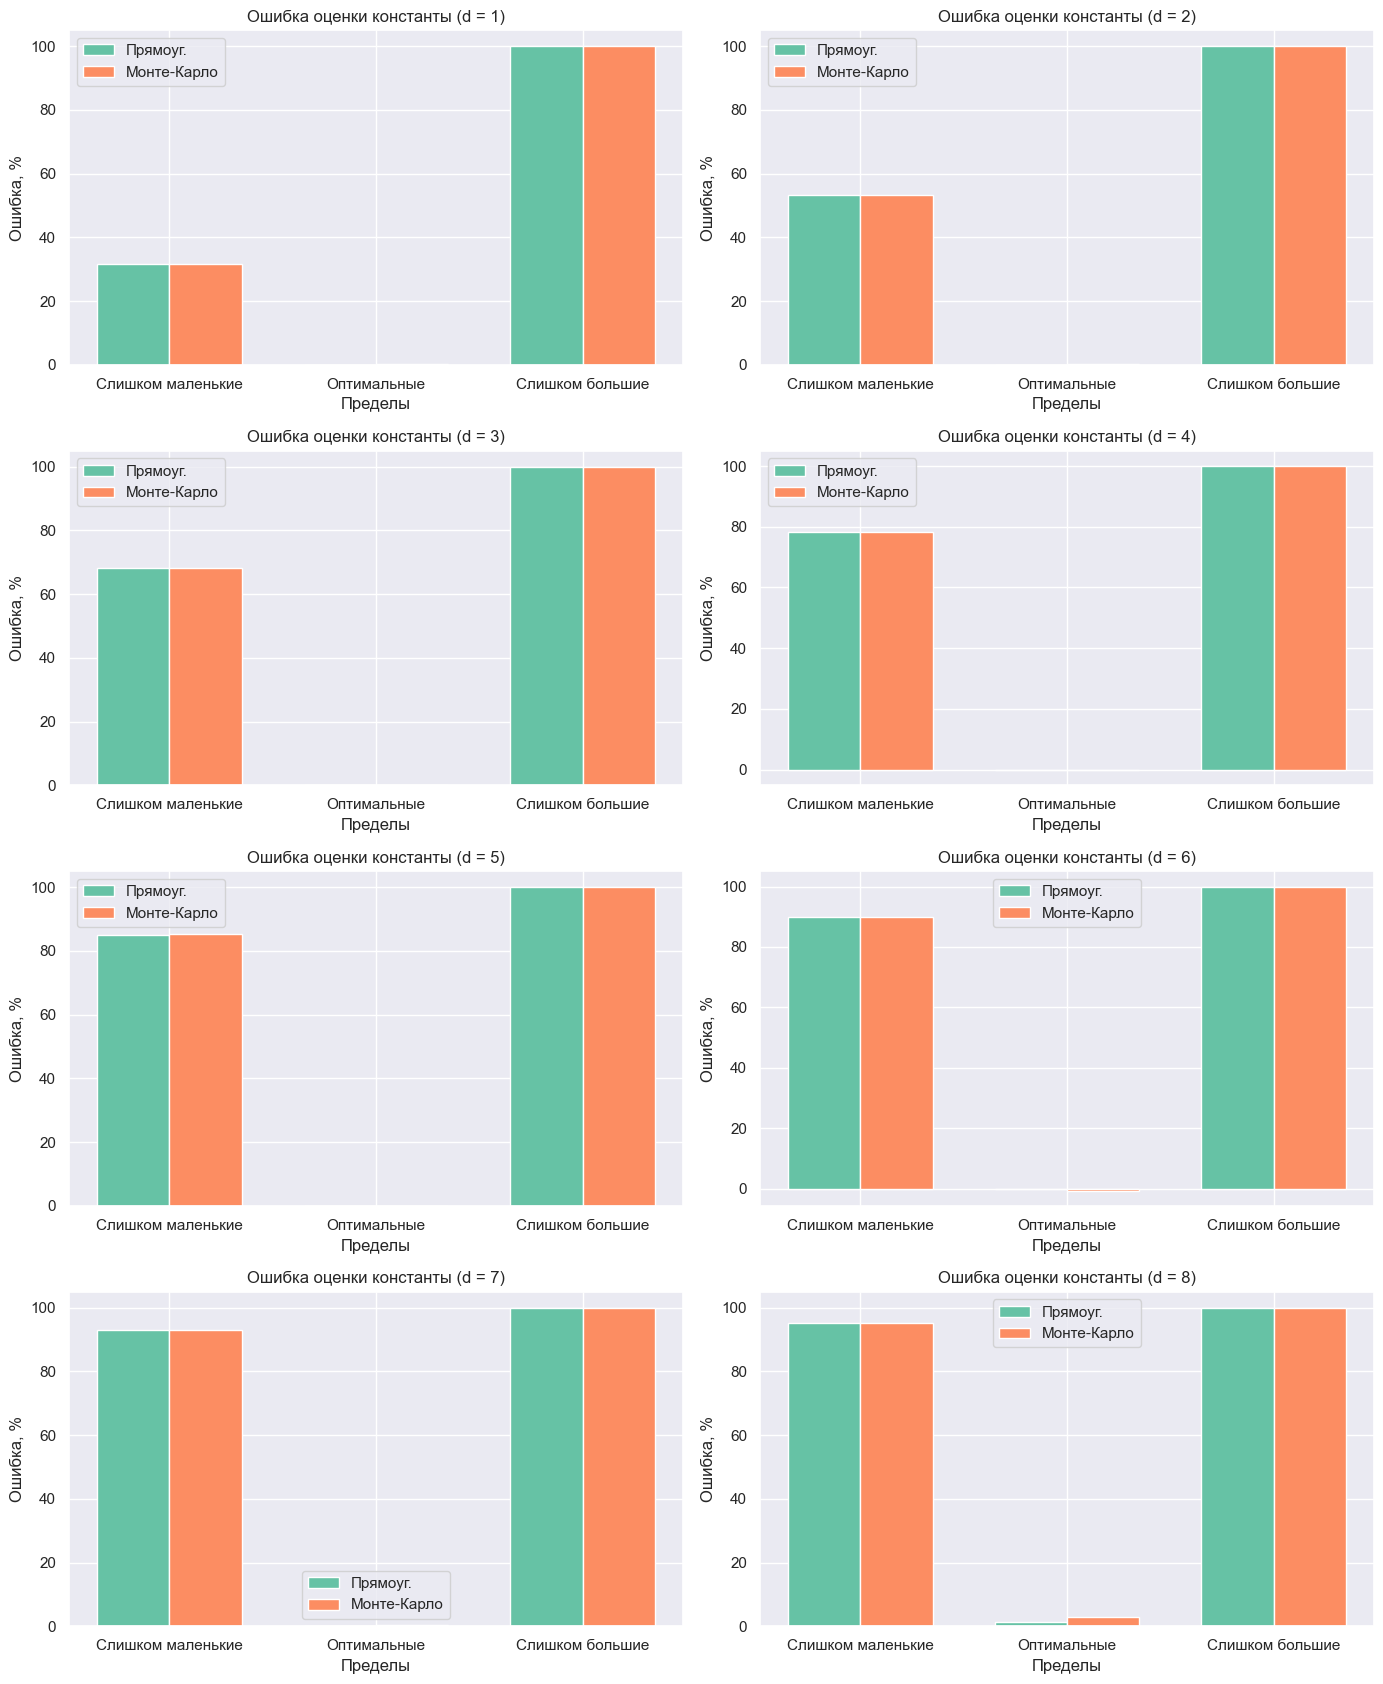

In [9]:
func = lambda m: np.exp(-0.5 * np.sum(m*m, axis=1))
xp = {d: {'method': ['rectangle', 'monte_carlo'], 'Слишком маленькие': [], 'Оптимальные': [], 'Слишком большие': []} for d in range(1,9)}
categories = ['Слишком маленькие', 'Оптимальные', 'Слишком большие']
for d in range(1,9):
    for lim, lim_name in zip((1, 5, 1e7), categories):
        for method in ('rectangle', 'monte_carlo'):
            I = Integrator.integrate(func=func, low=np.array([-lim]*d), high=np.array([lim]*d), n_iter=1e6, method=method)
            xp[d][lim_name].append((1 - I * np.power(2*np.pi, -d/2)) * 100)  # сохраняем ошибку оценки 
xp = {k: pd.DataFrame(v) for k,v in xp.items()}            

fig, axs = plt.subplots(4, 2, figsize=(14,17))
axes = axs.flatten()
for i, (d, df) in enumerate(xp.items()):
    x_indices = np.arange(len(categories))
    axes[i].bar(x_indices - 0.35/2, df.loc[df['method'] == 'rectangle'][categories].values.flatten(), label='Прямоуг.', width=0.35)
    axes[i].bar(x_indices + 0.35/2, df.loc[df['method'] == 'monte_carlo'][categories].values.flatten(), label='Монте-Карло', width=0.35)
    axes[i].set_title(f'Ошибка оценки константы (d = {d})')
    axes[i].set_ylabel('Ошибка, %')
    axes[i].set_xlabel('Пределы')
    axes[i].set_xticks(x_indices)
    axes[i].set_xticklabels(categories)
    axes[i].legend()
plt.tight_layout()
plt.show()

***Вывод:***
*Предполагаемые оптимальные пределы действительно оказались оптимальными: при них достигнута минимальная ошибка. Также подтвердились опасения касательно слишком маленьких пределов (мы не учли значимую часть хвостов, занизив оценку интеграла) и слишком больших пределов (значение функции почти во всех точках оказалось близко к 0, что занизило оценку интеграла).*

---
## Задача 3.

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *максимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск.

*Подсказка.* Обрати внимание на один из примеров с лекции. Кроме того, заметим, что класс из задачи 1 не подойдет для решения этой задачи. Достаточно написать семплирование непосредственно для этой задачи.

*Будем генерировать выборки 𝜉 и 𝜂 на каждом шаге. Причем 𝜉∼𝑁(0,1), 𝜂∼Poisson(𝜆=5)*

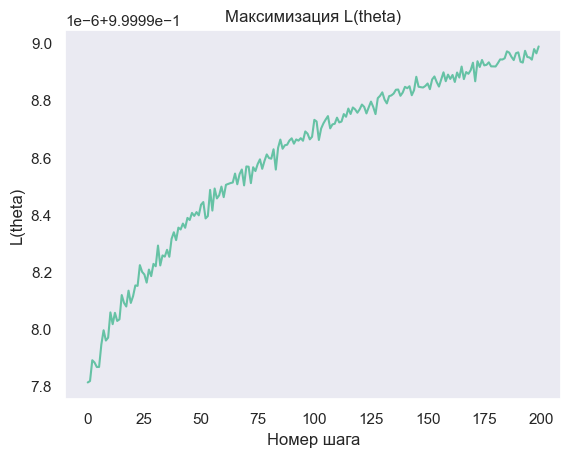

In [10]:
theta = 1000  # некоторое стартовое значение
lr = 1e9  # шаг обучения
values = []
xi_dist = sps.norm(loc=0, scale=1)  # 𝜉∼𝑁(0,1)
eta_dist = sps.poisson(5)  # 𝜂∼Poisson(𝜆=5)

for _ in range(200):
    # генерируем выборки (семплируем)
    sample_size = 10000
    xi = xi_dist.rvs(size=sample_size)
    eta = eta_dist.rvs(size=sample_size)
    value = np.exp(-((xi**2) * np.sqrt(eta)) / (1 + theta**2))
    values.append(np.mean(value))
    gradient = np.mean((2 * theta * (xi**2) * np.sqrt(eta)) / (1 + theta**2)**2 * value)
    theta += lr * gradient  # шаг SGD (+ потому что максимизируем)

plt.plot(list(range(len(values))), values)
plt.title("Максимизация L(theta)")
plt.xlabel("Номер шага")
plt.ylabel("L(theta)")
plt.grid()
plt.show()

In [11]:
theta, np.mean(np.exp(-((xi**2) * np.sqrt(eta)) / (1 + theta**2)))

(1454.8439573537628, 0.9999989900415196)

*Но на самом деле, это задача-ловушка. Максимум $\mathcal{L}(\theta)$ достигается при бесконечном значении $\theta$ (и тогда $\mathcal{L}(\theta)=1$)*  
*Если запускать не фиксированное кол-во эпох, а до выхода на плато, то алгоритм не останавливается, а уводит $\theta$ в бесконечность*  

___
## Задача 4.
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются, нужно только внимательно прочитать и расписать все семплирования.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, **используйте цикл по годам**.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

In [12]:
n = 25  # кол-во скважин
days_in_year = 365
c = 70  # стоимость бареля нефти ($)
min_oil_production = 100_000  # минимальная добыча (барели)
C_local = 200_000_000  # затраты на месторождение ($)
iterations = 100_000  # кол-во итераций

k_dist = sps.norm(loc=0.42, scale=0.012)
q_dist = sps.norm(loc=10_000, scale=3_000)
i_dist = sps.norm(loc=0.1, scale=0.012)
C_skw_dist = sps.triang(loc=90_000_000, c=1/3, scale=30_000_000)

In [ ]:
# npv_results = []

# for _ in range(iterations):
#     k = k_dist.rvs()  # коэф. нефтеотдачи
#     q = q_dist.rvs(size=n)  # темпы добычи для всех скважин
#     i = i_dist.rvs()  # ставка дисконтирования
#     C_skw = C_skw_dist.rvs(size=n)  # затраты на содержание скважин
#     t = 0
#     npv = 0
    
#     while True:  # считаем годы, пока добыча не упадет ниже минимума
#         t += 1
#         Q_t = np.sum(365 * k * q * np.exp(-0.008 * n * (t - 1)))  # общая добыча в году T
#         npv += (c * Q_t) / (1 + i) ** (t - 1)
#         if Q_t < min_oil_production:  # последний год разработки, фиксируем T
#             T = t
#             break
#     npv = npv - T * C_local - np.sum(C_skw)  # издержки на месторождение и скважины
#     npv_results.append(npv)

# npv_results = np.array(npv_results)

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b>   
<i>▫️ Код содержит циклы.        . Комм. Написан код с циклом по числу элементов в выборке. (-40.0)  
▫️ Не указана квантиль на графике. Комм. Квантиль $q_{0.1}$ следовало отметить на графике. (-5.0)  
▫️ Бины накладываются друг на друга. (-3.0)</i>

Для удобства, ячейки с исправлениями соединил в одну

0.1-квантиль NPV: 746488432 $
Среднее значение NPV: 1682465677 $
Вероятность положительного NPV: 99.29%


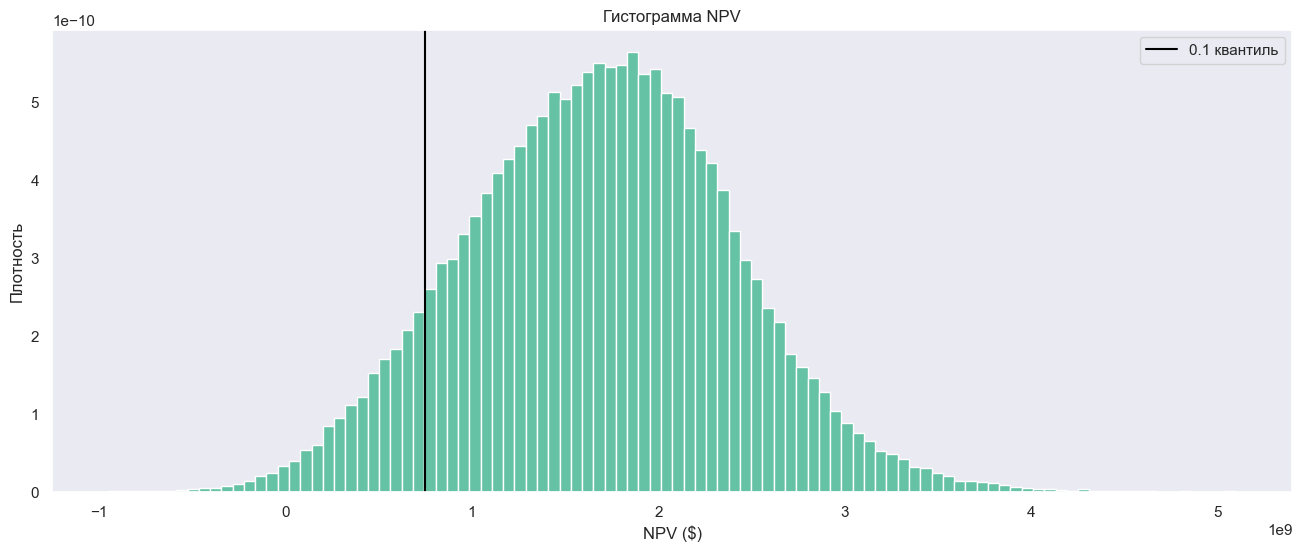

In [32]:
k = k_dist.rvs(size=iterations)  # коэф. нефтеотдачи
q = q_dist.rvs(size=(n,iterations))  # темпы добычи для всех скважин
i = i_dist.rvs(size=iterations)  # ставка дисконтирования
C_skw = C_skw_dist.rvs(size=(n,iterations))  # затраты на содержание скважин
t, T, npv_results = np.zeros(iterations), np.zeros(iterations), np.zeros(iterations)
    
while True:  # считаем годы, пока добыча не упадет ниже минимума (UPD: в условии написано, что цикл по годам разрешен, но я убрал цикл по iterations)
    t += 1
    Q_t = np.sum(365 * k * q * np.exp(-0.008 * n * (t - 1)), axis=0)  # общая добыча в году T
    npv_results += (c * Q_t) / (1 + i) ** (t - 1)
    T = np.where((T == 0) * (Q_t < min_oil_production), t, T)  # последний год разработки, фиксируем T
    if T.min() > 0:
        break
npv_results = npv_results - T * C_local - np.sum(C_skw, axis=0)  # издержки на месторождение и скважины

plt.figure(figsize=(16,6))
print(f"0.1-квантиль NPV: {round(np.quantile(npv_results, 0.1))} $")
print(f"Среднее значение NPV: {round(np.mean(npv_results))} $")
print(f"Вероятность положительного NPV: {np.mean(npv_results > 0):.2%}")
plt.hist(npv_results, bins=100, density=True)
plt.axvline(x=np.quantile(npv_results, 0.1), label='0.1 квантиль', color='black')  # квантиль
plt.title("Гистограмма NPV")
plt.xlabel("NPV ($)")
plt.ylabel("Плотность")
plt.legend()
plt.grid()
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

***Вывод:***  
*В рамках задачи удалось провести реалистичное исследование по добыче нефти. Были получены следующие значения:*   
*0.1-квантиль NPV: 738_874_146 \$ (то есть NPV < 738_874_146 с вероятностью 0.1)*  
*Среднее значение NPV: 1_680_696_496 \$*  
*Вероятность положительного NPV: 99.32% (т.е. проект с легкостью окупится)*  